In [1]:
import math
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

from astropy.io import fits
import astropy.units as u

import glob
import os
import time
import re

In [2]:
test_lc = fits.open("/home/chirag2000/Documents/projects/iitb_krittika_2022/project_solar_flares/data/xsm/XSM Extracted Light Curve/ch2_xsm_20190912_v1_level2.lc")

In [3]:
test_lc.info()

Filename: /home/chirag2000/Documents/projects/iitb_krittika_2022/project_solar_flares/data/xsm/XSM Extracted Light Curve/ch2_xsm_20190912_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   52644R x 4C   [D, E, E, E]   


In [4]:
# Time, Rate, Error, Fracexp 
test_lc[1].data

FITS_rec([(85041202.22925976, 4.657602 , 2.1581478, 1.),
          (85041203.22925976, 3.4772296, 1.8647331, 1.),
          (85041204.22925976, 3.4351614, 1.8534188, 1.), ...,
          (85103996.22925976, 3.890734 , 1.9724944, 1.),
          (85103997.22925976, 3.857839 , 1.9641383, 1.),
          (85103998.22925976, 4.0587525, 2.0146346, 1.)],
         dtype=(numpy.record, [('TIME', '>f8'), ('RATE', '>f4'), ('ERROR', '>f4'), ('FRACEXP', '>f4')]))

In [5]:
test_lc_data = test_lc[1].data

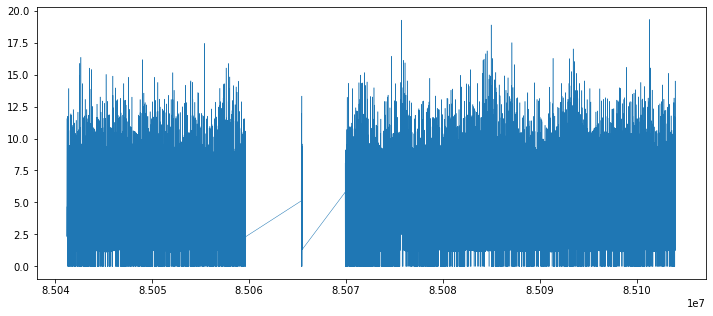

In [6]:
# Plotting Data as stored in the RATE column: time vs counts/s

plt.figure(figsize=(12, 5))
plt.plot(test_lc_data["TIME"], test_lc_data["RATE"], linewidth=0.5)
xmin1, xmax1 = plt.xlim()
#plt.xticks(list(np.arange(xmin1, xmax1)))

In [7]:
bins1 = math.floor(len(test_lc_data["TIME"])/75)
print(bins1)

701


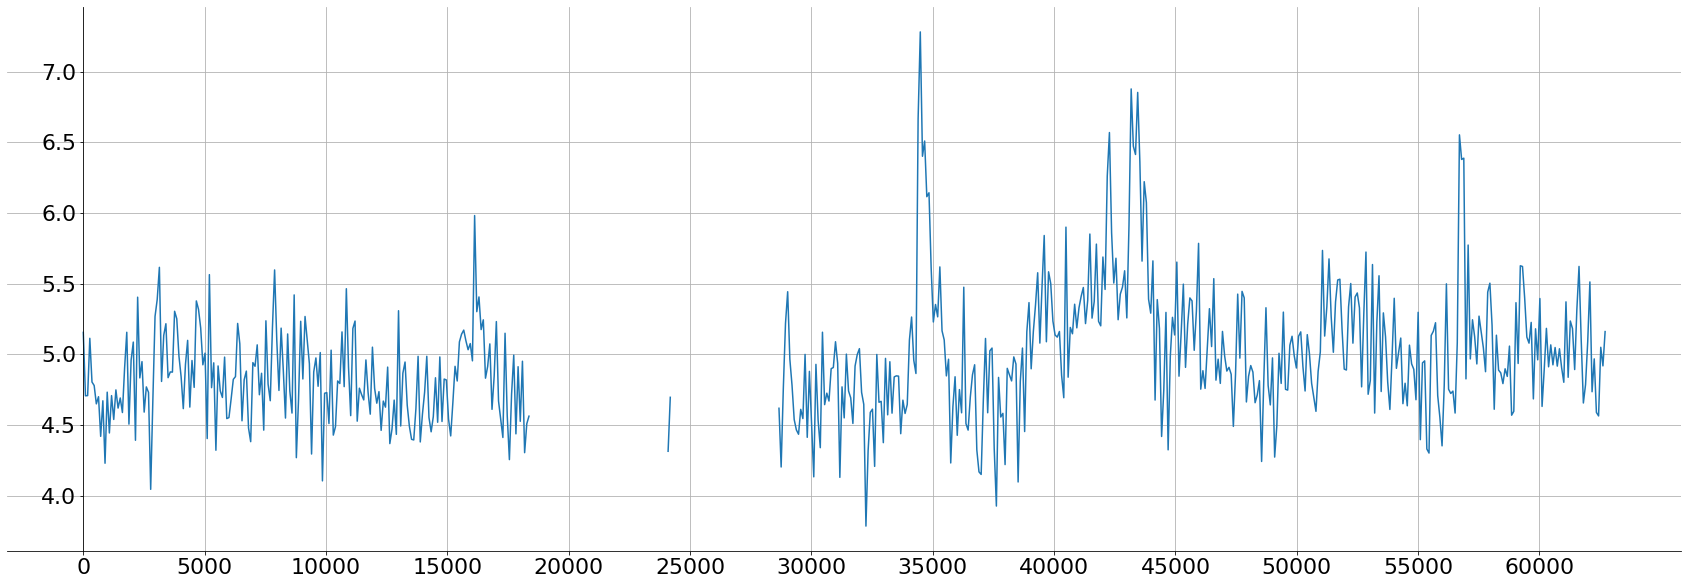

In [8]:
bin_means, bin_edges, binnumber = stats.binned_statistic(test_lc_data["TIME"], test_lc_data["RATE"], statistic='mean', bins=bins1)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2
# Relabling x axis... i.e. starting the x axis from 0 and going upto ~86k
mod_bin_centers = []
for i in range(len(bin_centers)):
    mod_bin_centers.append(bin_centers[i]-bin_centers[0])


plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(30, 10))
plt.plot(mod_bin_centers,bin_means)
plt.xticks(np.arange(0, max(mod_bin_centers), 5000))
plt.grid()
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_position(('data', 0))



In [9]:
(mod_bin_centers)

[0.0,
 59.69201520085335,
 119.3840304017067,
 179.07604560256004,
 238.7680608332157,
 298.46007603406906,
 358.1520912349224,
 417.84410643577576,
 477.5361216664314,
 537.2281368672848,
 596.9201520681381,
 656.6121672987938,
 716.3041824996471,
 775.9961977005005,
 835.6882129013538,
 895.3802281320095,
 955.0722433328629,
 1014.7642585337162,
 1074.4562737643719,
 1134.1482889652252,
 1193.8403041660786,
 1253.532319366932,
 1313.2243345975876,
 1372.916349798441,
 1432.6083649992943,
 1492.3003802001476,
 1551.9923954308033,
 1611.6844106316566,
 1671.37642583251,
 1731.0684410631657,
 1790.760456264019,
 1850.4524714648724,
 1910.1444866657257,
 1969.8365018963814,
 2029.5285170972347,
 2089.220532298088,
 2148.9125475287437,
 2208.604562729597,
 2268.2965779304504,
 2327.988593131304,
 2387.6806083619595,
 2447.372623562813,
 2507.064638763666,
 2566.7566539645195,
 2626.448669195175,
 2686.1406843960285,
 2745.832699596882,
 2805.5247148275375,
 2865.216730028391,
 2924.908745

In [10]:
# Appending filenames in a single list
directory = "/home/chirag2000/Documents/projects/iitb_krittika_2022/project_solar_flares/data/xsm/XSM Extracted Light Curve"

files = []

for entry in os.scandir(directory):
    if entry.is_file() and entry.name.endswith(".lc"):
        files.append(entry.path)

files.sort()

# Storing the number of files
no_of_files = len(files)


In [11]:
# No DATA FILES: 
# ch2_xsm_20200526_v1_level2.lc (i == 200)-- file # 201
# ch2_xsm_20201124_v1_level2.lc (i == 341)-- file # 342
# ch2_xsm_20201205_v1_level2.lc (i == 342)-- file # 343

# Plotting for all files in the "Light Curves Extracted" directory
# start_time = time.time()
# Iterating over the files
# for i in range(10):
#    if (i!=200 and i!=341 and i!=342):
#        file = fits.open(files[i])
#        file_data = file[1].data
#        file_length = file_data.shape[0]
#        bins1 = math.floor(len(file_data["TIME"])/50)     
#        bin_means, bin_edges, binnumber = stats.binned_statistic(file_data["TIME"], file_data["RATE"], statistic='mean', bins=bins1)
#        bin_width = (bin_edges[1] - bin_edges[0])
#        bin_centers = bin_edges[1:] - bin_width/2
#print(~))


In [11]:
binsize = int(input("Enter the binsize: "))


KeyboardInterrupt



In [ ]:
# Plotting for all files in the "Light Curves Extracted" directory

def retFig(x, y, title):
    plt.figure()
    plt.figure(figsize=(30, 10))
    plt.xlabel("TIME")
    plt.ylabel("RATE")
    plt.plot(x, y)
    plt.title(title)

pp = PdfPages('/home/chirag2000/Documents/projects/iitb_krittika_2022/project_solar_flares/output/task 2/pdf_files/task2.pdf')
# Iterating over the files
start_time = time.time()

for i in range(no_of_files):
    file = fits.open(files[i])
    file_data = file[1].data
    file_length = file_data.shape[0]
    
    title = re.split('[/_.]', files[i])[16]
    
    # temp variable captures the empty data files
    temp = file_data.shape
    if temp[0]==1 or temp[0]==10:
        continue
    
    bins1 = math.floor(len(file_data["TIME"])/int(binsize))     
    bin_means, bin_edges, binnumber = stats.binned_statistic(file_data["TIME"], file_data["RATE"], statistic='mean', bins=bins1)
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2
    
    fig = retFig(bin_centers, bin_means, title)
    pp.savefig(fig)
    plt.savefig('/home/chirag2000/Documents/projects/iitb_krittika_2022/project_solar_flares/output/task 2/png_files/all_light_curves/'+ str(title))
    plt.close(fig)
    
pp.close()

print("--- %s seconds ---" % (time.time() - start_time))


In [ ]:
# Plotting for all files in the "Light Curves Extracted" directory
# Plotting lightcurves after shifting the x axis to the origin
def retFig(x, y, title):
    plt.figure()
    plt.figure(figsize=(30, 10))
    plt.xlabel("TIME")
    plt.ylabel("RATE")
    plt.plot(x, y)
    plt.title(title)

pp = PdfPages('/home/chirag2000/Documents/projects/iitb_krittika_2022/project_solar_flares/output/task 2/pdf_files/task2_after_shifting.pdf')
# Iterating over the files
start_time = time.time()

for i in range(no_of_files):
    file = fits.open(files[i])
    file_data = file[1].data
    file_length = file_data.shape[0]
    
    title = re.split('[/_.]', files[i])[16]
    
    # temp variable captures the empty data files
    temp = file_data.shape
    if temp[0]==1 or temp[0]==10:
        continue
    
    bins1 = math.floor(len(file_data["TIME"])/int(binsize))     
    bin_means, bin_edges, binnumber = stats.binned_statistic(file_data["TIME"], file_data["RATE"], statistic='mean', bins=bins1)
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2
    mod_bin_centers = []
    for i in range(len(bin_centers)):
        mod_bin_centers.append(bin_centers[i]-bin_centers[0])
    
    fig = retFig(mod_bin_centers, bin_means, title)
    pp.savefig(fig)
    plt.savefig('/home/chirag2000/Documents/projects/iitb_krittika_2022/project_solar_flares/output/task 2/png_files/all_light_curves_after_shifting/'+ str(title))
    plt.close(fig)
    
pp.close()

print("--- %s seconds ---" % (time.time() - start_time))
